In [4]:
import numpy as np
import pandas as pd

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


## Agricultural Data

In [95]:
agri_data = pd.read_csv('agri-data.csv')

In [96]:
agri_data['commodity'] = agri_data['commodity'].apply(lambda x: x.lower())

In [97]:
agri_data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,banana - green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,bhindi(ladies finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,black pepper,Other,04/03/2019,110000,130000,120000
...,...,...,...,...,...,...,...,...,...
2233,West Bengal,Uttar Dinajpur,Islampur,potato,Jyoti,04/03/2019,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,rice,Other,04/03/2019,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,jute,TD-5,04/03/2019,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,rice,Other,04/03/2019,3450,3550,3500


In [98]:
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [99]:
agri_data.describe()

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,2456.230563,2855.890527,2698.865952
std,3452.497680,3917.251520,3694.830905
min,0.000000,0.000000,2.000000
25%,800.000000,1000.000000,950.000000
50%,1700.000000,1960.000000,1831.500000
75%,3200.000000,3700.000000,3500.000000
max,110000.000000,130000.000000,120000.000000


The Problem statement says we need to geolocation, price and rainfall. Modal Price is the mean of max and min price, and we can use that for our analysis.

In [100]:
ad = agri_data[['state', 'commodity', 'modal_price']]
ad

,state,commodity,modal_price
0,Andaman and Nicobar,amaranthus,7000
1,Andaman and Nicobar,banana - green,5000
2,Andaman and Nicobar,bhindi(ladies finger),7000
3,Andaman and Nicobar,bitter gourd,7000
4,Andaman and Nicobar,black pepper,120000
...,...,...,...
2233,West Bengal,potato,550
2234,West Bengal,rice,3600
2235,West Bengal,jute,4500
2236,West Bengal,rice,3500


In [101]:
ad['state'].apply(lambda x: x.lower())

0       andaman and nicobar
1       andaman and nicobar
2       andaman and nicobar
3       andaman and nicobar
4       andaman and nicobar
               ...         
2233            west bengal
2234            west bengal
2235            west bengal
2236            west bengal
2237            west bengal
Name: state, Length: 2238, dtype: object

In [102]:
ad.state.unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Assam', 'Chattisgarh',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Nagaland', 'Odisha',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [103]:
array_one = ad.commodity.unique()

In [104]:
ad = ad.loc[ad['commodity'].isin(common_list)]

<AxesSubplot: xlabel='commodity'>

<Figure size 1008x504 with 0 Axes>

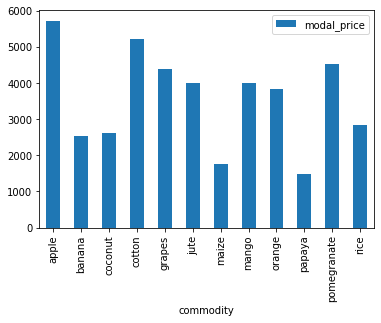

In [105]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14, 7))
tempd = ad.groupby('commodity').mean()
tempd.plot.bar()

<AxesSubplot: xlabel='state'>

<Figure size 1008x504 with 0 Axes>

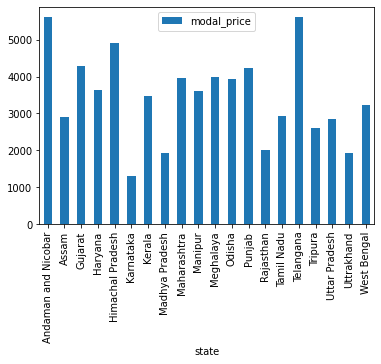

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14, 7))
tempd = ad.groupby('state').mean()
tempd.plot.bar()

## Crop Data

In [107]:
crop_data = pd.read_csv('crop-data.csv')

In [108]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [109]:
cd = crop_data[['temperature', 'humidity', 'rainfall', 'label']]

In [110]:
cd.head()

,temperature,humidity,rainfall,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice


In [111]:
cd.describe()

,temperature,humidity,rainfall
count,2200.000000,2200.000000,2200.000000
mean,25.616244,71.481779,103.463655
std,5.063749,22.263812,54.958389
min,8.825675,14.258040,20.211267
25%,22.769375,60.261953,64.551686
50%,25.598693,80.473146,94.867624
75%,28.561654,89.948771,124.267508
max,43.675493,99.981876,298.560117


In [112]:
array_two = cd.label.unique()

In [113]:
common_list = set(array_one).intersection(array_two)

In [114]:
common_list

{'apple',
 'banana',
 'coconut',
 'cotton',
 'grapes',
 'jute',
 'maize',
 'mango',
 'orange',
 'papaya',
 'pomegranate',
 'rice'}

In [115]:
cd = cd.loc[cd['label'].isin(common_list)]
cd

,temperature,humidity,rainfall,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice
...,...,...,...,...
2095,23.874845,86.792613,177.514731,jute
2096,23.928879,88.071123,154.660874,jute
2097,24.814412,81.686889,190.788639,jute
2098,24.447439,82.286484,190.968489,jute


<AxesSubplot: xlabel='label'>

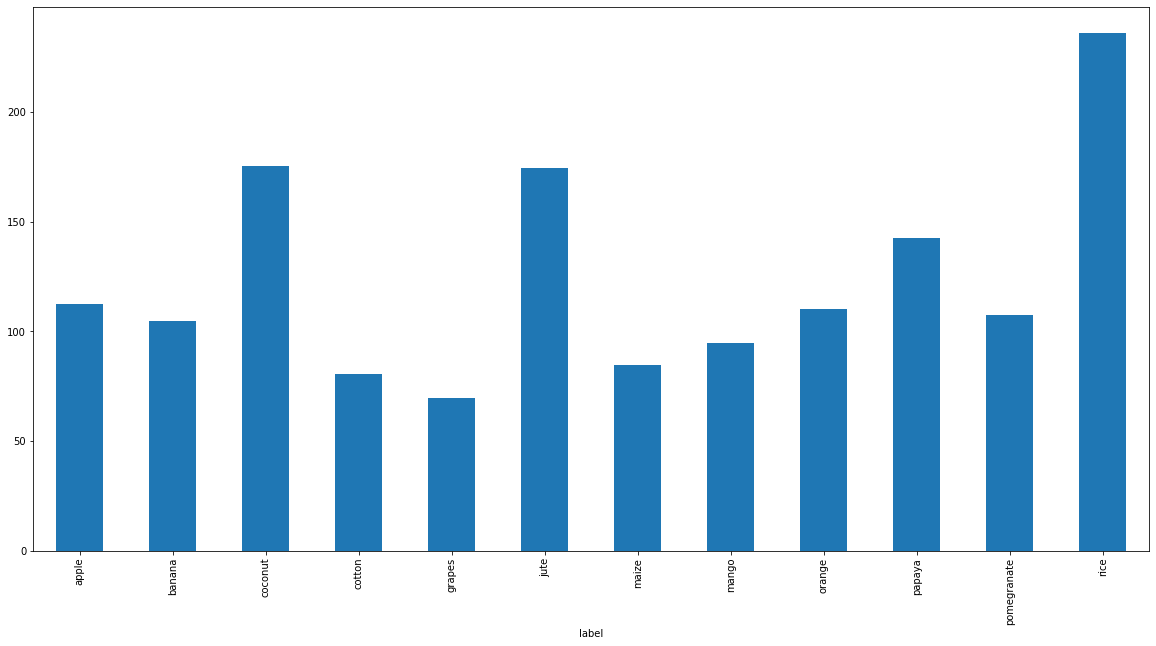

In [116]:
fig = plt.figure(figsize = (20, 10))
tempd = cd.groupby('label').mean()
tempd['rainfall'].plot.bar()

## Rainfall Data

In [117]:
rainfall_data = pd.read_csv('rainfall-india.csv')

In [118]:
rainfall_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [119]:
rainfall_data = rainfall_data[['SUBDIVISION', 'YEAR','Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']]
rainfall_data

,SUBDIVISION,YEAR,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,69.3,76.7,958.5,290.5


In [120]:
rainfall_data['SUBDIVISION'] = rainfall_data['SUBDIVISION'].apply(lambda x: x.lower())

In [121]:
rainfall_data

,SUBDIVISION,YEAR,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,andaman & nicobar islands,1901,136.3,560.3,1696.3,980.3
1,andaman & nicobar islands,1902,159.8,458.3,2185.9,716.7
2,andaman & nicobar islands,1903,156.7,236.1,1874.0,690.6
3,andaman & nicobar islands,1904,24.1,506.9,1977.6,571.0
4,andaman & nicobar islands,1905,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...
4111,lakshadweep,2011,7.9,196.2,1013.0,316.6
4112,lakshadweep,2012,19.3,99.6,1119.5,167.1
4113,lakshadweep,2013,60.6,131.1,1057.0,177.6
4114,lakshadweep,2014,69.3,76.7,958.5,290.5


In [122]:
array3 = rainfall_data.SUBDIVISION.unique()

In [123]:
rd = rainfall_data

<AxesSubplot: xlabel='SUBDIVISION'>

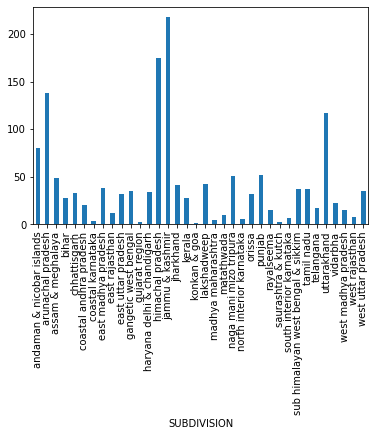

In [124]:
tempd = rd.groupby('SUBDIVISION')[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].mean()
tempd['Jan-Feb'].plot.bar()

<AxesSubplot: xlabel='SUBDIVISION'>

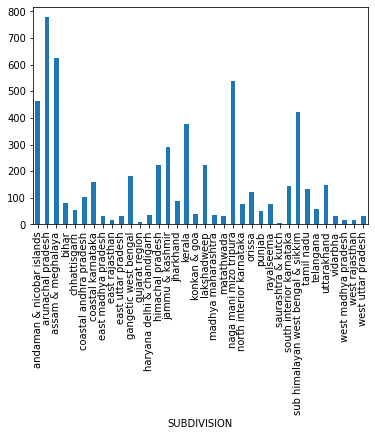

In [125]:
tempd['Mar-May'].plot.bar()

<AxesSubplot: xlabel='SUBDIVISION'>

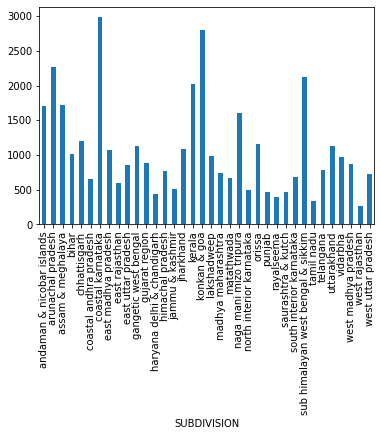

In [126]:
tempd['Jun-Sep'].plot.bar()

<AxesSubplot: xlabel='SUBDIVISION'>

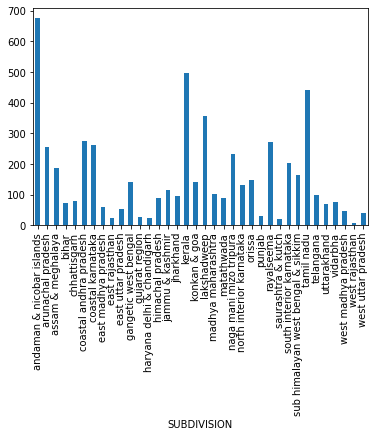

In [127]:
tempd['Oct-Dec'].plot.bar()

## Weather Data

In [128]:
weather_data = pd.read_csv('weather-data.csv')

In [129]:
weather_data['Temp'] = [23.840426, 28.490798, 24.996415, 25.221240, 27.762509, 23.840426, 26.991617, 26.710142]
weather_data['Prcp'] = [4.414119, 6.244378, 3.662478, 4.535650, 10.942007, 4.414119, 7.073603, 5.695035]
weather_data

,longitude,Latitude,Elevation,Location_Name,Temp,Prcp
0,73.0167,26.3000,217.0,Bangalore,23.840426,4.414119
1,80.2500,13.0667,6.0,Chennai,28.490798,6.244378
2,77.2000,28.5833,211.0,Delhi,24.996415,3.662478
3,80.9330,26.8667,110.0,Lucknow,25.221240,4.535650
4,72.8500,19.1167,8.0,Mumbai,27.762509,10.942007
5,77.5833,12.9667,920.0,Rajastan,23.840426,4.414119
6,85.8333,20.2500,NaN,Bubhneshwar,26.991617,7.073603
7,84.8833,22.2167,NaN,Rourkela,26.710142,5.695035


No real leads, thus this line of inquiry is abandoned.

# Collating the Data

In [130]:
ad.groupby(['state']).mean()
ad

,state,commodity,modal_price
11,Andaman and Nicobar,coconut,5600
23,Assam,rice,2400
24,Assam,rice,2800
43,Assam,jute,2800
46,Assam,rice,4500
...,...,...,...
2229,West Bengal,rice,4400
2232,West Bengal,jute,4600
2234,West Bengal,rice,3600
2235,West Bengal,jute,4500


In [131]:
cd[['label','rainfall']].groupby('label').mean()

,rainfall
label,
apple,112.654779
banana,104.626980
coconut,175.686646
cotton,80.398043
grapes,69.611829
jute,174.792798
maize,84.766988
mango,94.704515
orange,110.474969


In [132]:
crop_rain = {
'apple': 112.654779,
'banana': 104.626980,
'coconut': 175.686646,
'cotton': 80.398043,
'grapes': 69.611829,
'jute': 174.792798,
'maize': 84.766988,
'mango': 94.704515,
'orange': 110.474969,
'papaya': 142.627839,
'pomegranate': 107.528442,
'rice': 236.181114,
}
print(crop_rain)

{'apple': 112.654779, 'banana': 104.62698, 'coconut': 175.686646, 'cotton': 80.398043, 'grapes': 69.611829, 'jute': 174.792798, 'maize': 84.766988, 'mango': 94.704515, 'orange': 110.474969, 'papaya': 142.627839, 'pomegranate': 107.528442, 'rice': 236.181114}


In [43]:
agri = pd.read_csv('agri.csv')
agri

,state,commodity,modal_price
0,andaman and nicobar,coconut,5600.000000
1,assam,jute,3350.000000
2,assam,maize,1800.000000
3,assam,rice,2942.857143
4,gujarat,cotton,5230.000000
...,...,...,...
72,uttrakhand,orange,1800.000000
73,uttrakhand,papaya,700.000000
74,uttrakhand,pomegranate,3500.000000
75,west bengal,jute,4133.333333


In [136]:
agri = ad
agri['rainfall'] = agri['commodity']
agri["rainfall"].replace(crop_rain, inplace=True)
agri

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7836\1692606567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri['rainfall'] = agri['commodity']
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7836\1692606567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri["rainfall"].replace(crop_rain, inplace=True)


,state,commodity,modal_price,rainfall
11,Andaman and Nicobar,coconut,5600,175.686646
23,Assam,rice,2400,236.181114
24,Assam,rice,2800,236.181114
43,Assam,jute,2800,174.792798
46,Assam,rice,4500,236.181114
...,...,...,...,...
2229,West Bengal,rice,4400,236.181114
2232,West Bengal,jute,4600,174.792798
2234,West Bengal,rice,3600,236.181114
2235,West Bengal,jute,4500,174.792798


In [140]:
agri.to_csv('agricult-data.csv')

In [137]:
rd = rd[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']]
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Jan-Feb  4110 non-null   float64
 1   Mar-May  4107 non-null   float64
 2   Jun-Sep  4106 non-null   float64
 3   Oct-Dec  4103 non-null   float64
dtypes: float64(4)
memory usage: 128.8 KB


In [46]:
ad = agri
ad

,state,commodity,modal_price,rainfall
0,andaman and nicobar,coconut,5600.000000,175.686646
1,assam,jute,3350.000000,174.792798
2,assam,maize,1800.000000,84.766988
3,assam,rice,2942.857143,236.181114
4,gujarat,cotton,5230.000000,80.398043
...,...,...,...,...
72,uttrakhand,orange,1800.000000,110.474969
73,uttrakhand,papaya,700.000000,142.627839
74,uttrakhand,pomegranate,3500.000000,107.528442
75,west bengal,jute,4133.333333,174.792798


In [50]:
rd['Jan-Feb'] = rd['Jan-Feb'].apply(lambda x: x/2)
rd['Mar-May'] = rd['Mar-May'].apply(lambda x: x/3)
rd['Jun-Sep'] = rd['Jun-Sep'].apply(lambda x: x/4)
rd['Oct-Dec'] = rd['Oct-Dec'].apply(lambda x: x/3)

In [51]:
rd

,SUBDIVISION,YEAR,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,andaman & nicobar islands,1901,68.15,186.766667,424.075,326.766667
1,andaman & nicobar islands,1902,79.90,152.766667,546.475,238.900000
2,andaman & nicobar islands,1903,78.35,78.700000,468.500,230.200000
3,andaman & nicobar islands,1904,12.05,168.966667,494.400,190.333333
4,andaman & nicobar islands,1905,0.65,103.233333,406.225,210.266667
...,...,...,...,...,...,...
4111,lakshadweep,2011,3.95,65.400000,253.250,105.533333
4112,lakshadweep,2012,9.65,33.200000,279.875,55.700000
4113,lakshadweep,2013,30.30,43.700000,264.250,59.200000
4114,lakshadweep,2014,34.65,25.566667,239.625,96.833333


## Making the Model

In [141]:
df = pd.read_csv('agricult-data.csv')

In [142]:
df.head()

,Unnamed: 0,state,commodity,modal_price,rainfall
0,11,Andaman and Nicobar,coconut,5600,175.686646
1,23,Assam,rice,2400,236.181114
2,24,Assam,rice,2800,236.181114
3,43,Assam,jute,2800,174.792798
4,46,Assam,rice,4500,236.181114


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   314 non-null    int64  
 1   state        314 non-null    object 
 2   commodity    314 non-null    object 
 3   modal_price  314 non-null    int64  
 4   rainfall     314 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.4+ KB


In [151]:
df.describe()

,Unnamed: 0,modal_price,rainfall
count,314.000000,314.000000,314.000000
mean,1158.786624,3326.175159,133.919452
std,648.165681,1798.630513,54.375183
min,11.000000,475.000000,69.611829
25%,657.250000,1955.000000,104.626980
50%,1241.000000,2967.500000,110.474969
75%,1679.500000,4300.000000,175.686646
max,2236.000000,11000.000000,236.181114


In [143]:
df.commodity.unique()

array(['coconut', 'rice', 'jute', 'maize', 'cotton', 'banana', 'grapes',
       'apple', 'orange', 'pomegranate', 'papaya', 'mango'], dtype=object)

In [145]:
rd.describe()

,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4110.000000,4107.000000,4106.000000,4103.000000
mean,40.747786,155.901753,1064.724769,154.100487
std,59.308277,201.316965,707.741531,166.942660
min,0.000000,0.000000,57.400000,0.000000
25%,4.100000,24.050000,573.850000,34.200000
50%,19.200000,74.800000,881.100000,98.200000
75%,50.375000,196.950000,1288.175000,213.500000
max,699.500000,1745.800000,4536.900000,1252.500000


Rice - K
Maize - K
Jute - Z
Coconut - K
Cotton - K
Banana - K
Grapes - R
Apple - K
Orange - K
Pomegranate - Z
Papaya - K
Mango - R

In [146]:
crop_season = {
'apple': 'K',
'banana': 'K',
'coconut': 'K',
'cotton': 'K',
'grapes': 'R',
'jute': 'Z',
'maize': 'K',
'mango': 'R',
'orange': 'K',
'papaya': 'K',
'pomegranate': 'Z',
'rice': 'K',
}
print(crop_season)

{'apple': 'K', 'banana': 'K', 'coconut': 'K', 'cotton': 'K', 'grapes': 'R', 'jute': 'Z', 'maize': 'K', 'mango': 'R', 'orange': 'K', 'papaya': 'K', 'pomegranate': 'Z', 'rice': 'K'}


In [147]:
df['season'] = df['commodity']
df["season"].replace(crop_season, inplace=True)

In [148]:
df.head()

,Unnamed: 0,state,commodity,modal_price,rainfall,season
0,11,Andaman and Nicobar,coconut,5600,175.686646,K
1,23,Assam,rice,2400,236.181114,K
2,24,Assam,rice,2800,236.181114,K
3,43,Assam,jute,2800,174.792798,Z
4,46,Assam,rice,4500,236.181114,K


In [149]:
df.state.unique()

array(['Andaman and Nicobar', 'Assam', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Odisha', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttrakhand', 'West Bengal'], dtype=object)

In [150]:
df.season.unique()

array(['K', 'Z', 'R'], dtype=object)

In [152]:
state_dict = {}
count = 0
for ele in list(df.state.unique()):
    state_dict[ele] = count
    count+=1
state_dict

{'Andaman and Nicobar': 0,
 'Assam': 1,
 'Gujarat': 2,
 'Haryana': 3,
 'Himachal Pradesh': 4,
 'Karnataka': 5,
 'Kerala': 6,
 'Madhya Pradesh': 7,
 'Maharashtra': 8,
 'Manipur': 9,
 'Meghalaya': 10,
 'Odisha': 11,
 'Punjab': 12,
 'Rajasthan': 13,
 'Tamil Nadu': 14,
 'Telangana': 15,
 'Tripura': 16,
 'Uttar Pradesh': 17,
 'Uttrakhand': 18,
 'West Bengal': 19}

In [153]:
season_dict = {}
count = 0
for ele in list(df.season.unique()):
    season_dict[ele] = count
    count+=1
season_dict

{'K': 0, 'Z': 1, 'R': 2}

<hr>

# K-Nearest Neighbours
Accuracy: 62%

In [154]:
knnd = df
knnd["state"].replace(state_dict, inplace=True)
knnd["season"].replace(season_dict, inplace=True)

In [155]:
knnd.head()

,Unnamed: 0,state,commodity,modal_price,rainfall,season
0,11,0,coconut,5600,175.686646,0
1,23,1,rice,2400,236.181114,0
2,24,1,rice,2800,236.181114,0
3,43,1,jute,2800,174.792798,1
4,46,1,rice,4500,236.181114,0


In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [157]:
X = knnd[['state','season','modal_price']]
Y = knnd['commodity']

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [159]:
Y

array([ 2, 11, 11,  5, 11, 11, 11,  5,  6, 11, 11,  3,  6,  6,  3,  3,  3,
        3,  1,  4,  0,  4,  8, 10,  1,  4,  8,  9, 10,  0,  1,  4,  8, 10,
        0, 10,  0,  1,  4,  8,  9, 10,  0,  4,  8,  9, 10,  1,  4,  9,  9,
        0,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  8,  1,  2,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  8,  3,  8, 10,  3,
        1,  3,  6,  0,  7,  3,  0,  4,  8,  4,  0,  1,  4, 10,  1,  1, 11,
        1, 11,  1, 11,  1, 11,  1, 11,  1,  8,  1,  1,  2,  6, 11,  6,  8,
        8,  8, 11,  4,  4,  9,  1,  3,  4,  4,  0,  1,  3,  4,  4, 10,  0,
        1,  9,  1,  4,  9, 10,  6,  2,  2,  2,  6,  2,  2,  6,  2,  2,  2,
        2,  2,  2,  6,  3,  2,  6,  2,  2,  2,  2,  2,  2,  3,  2,  3,  3,
        2,  3,  2,  3,  3,  2,  6,  3,  2,  2,  6,  6,  3,  6,  6,  3,  3,
        3, 11,  1, 11,  0,  1,  9, 11,  0,  1, 11,  0,  1,  9,  0,  1,  9,
       11,  6,  0,  9, 10

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 4625)

In [198]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [218]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [219]:
y_pred = classifier.predict(X_test)

In [220]:
y_pred

array([ 2, 11,  6,  1,  1,  0,  1,  1,  3,  1,  1,  1,  1,  1,  3,  4,  1,
        3, 11, 10,  1,  1,  6,  0,  4,  0, 11,  1,  6,  3, 10,  1,  6,  5,
        1,  0,  1,  0, 11,  6,  1,  3, 11,  1,  4, 11,  2,  1,  3, 11, 11,
        4, 11,  1,  1,  1, 11, 11,  1,  2,  1,  0,  1,  3, 11,  3,  5,  0,
       11, 11,  1,  1,  2,  1,  1, 10,  1,  2,  1])

In [221]:
y_test

array([ 6, 11,  2,  2,  1,  0,  8,  9,  3,  1,  1,  1,  9,  2,  3,  4,  2,
        3, 11, 10,  1,  1,  1,  3,  7,  0,  1,  1,  6,  8, 10,  1,  2,  5,
        1, 11,  6,  3, 11,  2,  3,  3, 11,  1,  4, 11,  2,  3,  3, 11, 11,
        4,  9,  1,  1,  1, 11, 11,  9,  2, 11,  0,  8,  1, 11,  1, 10,  0,
       11, 11,  1, 11,  2,  1,  0, 10,  1,  2,  6])

In [222]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [223]:
ac

0.620253164556962

<hr>

# Decision Tree
Accuracy: 71%

In [224]:
from sklearn.tree import DecisionTreeClassifier

In [272]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [273]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [274]:
y_test

array([ 6, 11,  2,  2,  1,  0,  8,  9,  3,  1,  1,  1,  9,  2,  3,  4,  2,
        3, 11, 10,  1,  1,  1,  3,  7,  0,  1,  1,  6,  8, 10,  1,  2,  5,
        1, 11,  6,  3, 11,  2,  3,  3, 11,  1,  4, 11,  2,  3,  3, 11, 11,
        4,  9,  1,  1,  1, 11, 11,  9,  2, 11,  0,  8,  1, 11,  1, 10,  0,
       11, 11,  1, 11,  2,  1,  0, 10,  1,  2,  6])

In [275]:
y_test_pred

array([ 2, 11,  1,  3,  1,  0,  1,  9,  3,  1,  1,  1,  1,  1,  3,  4,  1,
        3, 11,  1,  8,  1,  1,  8,  4,  0, 11,  1,  6,  1, 10,  1,  9,  5,
        1, 11,  1,  3, 11,  1,  3, 11, 11,  9,  4, 11,  2,  3,  3, 11, 11,
        4, 11,  1,  1,  1, 11, 11,  9,  2,  1,  0,  1,  1, 11,  1, 10,  0,
       11, 11,  1,  1,  2,  9,  0, 10,  1,  2,  6])

In [276]:
print(accuracy_score(y_test, y_test_pred))

0.7088607594936709


<hr>

# SVM Classifier
Accuracy: 45%

In [282]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [283]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.45569620253164556
